## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
SAVE = [True, False]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bSave in SAVE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(filepath="./tmp_%s.h5" % bSave, 
                                 monitor="val_loss", 
                                 save_best_only=bSave)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-sb-%s" % bSave
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 4s 86us/step - loss: 0.5704 - accuracy: 0.8311 - val_loss: 1.6162 - val_accuracy: 0.4878
Epoch 47/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.5536 - accuracy: 0.8390 - val_loss: 1.6281 - val_accuracy: 0.4866
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5369 - accuracy: 0.8439 - val_loss: 1.6551 - val_accuracy: 0.4875
Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.5204 - accuracy: 0.8516 - val_loss: 1.6601 - val_accuracy: 0.4899
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5031 - accuracy: 0.8599 - val_loss: 1.6890 - val_accuracy: 0.4822
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 4s 83us/step - loss: 0.6500 - accuracy: 0.7997 - val_loss: 1.5728 - val_accuracy: 0.4917
Epoch 42/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.6313 - accuracy: 0.8068 - val_loss: 1.5752 - val_accuracy: 0.5017
Epoch 43/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.6132 - accuracy: 0.8140 - val_loss: 1.5925 - val_accuracy: 0.4891
Epoch 44/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5958 - accuracy: 0.8212 - val_loss: 1.6155 - val_accuracy: 0.4937
Epoch 45/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.5789 - accuracy: 0.8284 - val_loss: 1.6352 - val_accuracy: 0.4910
Epoch 46/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5607 - accuracy: 0.8374 - val_loss: 1.6228 - val_accuracy: 0.4889
Epoch 47/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.5439 - accuracy: 0.8420 - val_loss: 1.6399

10000/10000 [==============================] - 1s 90us/step


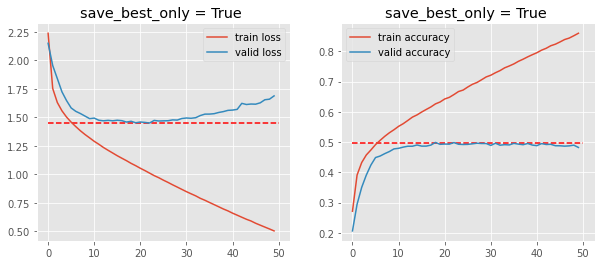

10000/10000 [==============================] - 1s 98us/step


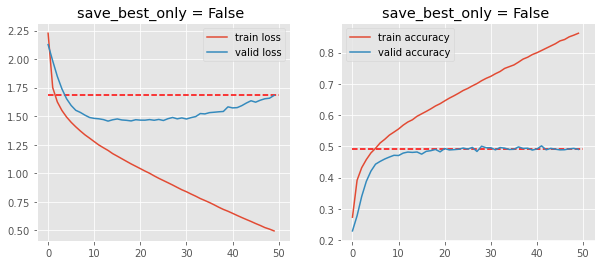

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.style.use('ggplot')

for i, cond in enumerate(results.keys()):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    model = keras.models.load_model("./tmp_%s.h5" % (not i))
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], label="train loss")
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], label="valid loss")
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(results[cond]['train-loss']), colors='r', linestyles='--')
    plt.title("save_best_only = %s " % (not i))
    plt.legend()

    plt.subplot(122)
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], label="train accuracy")
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], label="valid accuracy")
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(results[cond]['train-acc']), colors='r', linestyles='--')
    plt.title("save_best_only = %s " % (not i))
    plt.legend()
    plt.show()


In [20]:
model1 = build_mlp(input_shape=x_train.shape[1:])
model1.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_weights_only=True)

model1.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt],
          verbose=0
         )

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512 

In [21]:
print('test before load: ', model1.evaluate(x_test[0:5],y_test[0:5]))

5/5 [==============================] - 0s 598us/step
test before load:  [2.770705223083496, 0.20000000298023224]


In [22]:
model2 = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.load_weights('./tmp.h5')

print('test after load: ', model2.evaluate(x_test[0:5],y_test[0:5]))

5/5 [==============================] - 0s 32ms/step
test after load:  [2.770705223083496, 0.20000000298023224]


In [24]:
model2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512 